In [1]:
# SQL Alchemy
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [3]:
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

In [4]:
# Query All Records in the the Database
data = engine.execute("SELECT date, prcp FROM measurement WHERE (date) >= '2017-01-01';")
#for record in data:
 #   print(record)

In [5]:
# Query All Records in the the Database
data = pd.read_sql("SELECT date, prcp FROM measurement WHERE (date) >= '2017-01-01';",conn)
data = data.set_index('date')
data.head()


,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


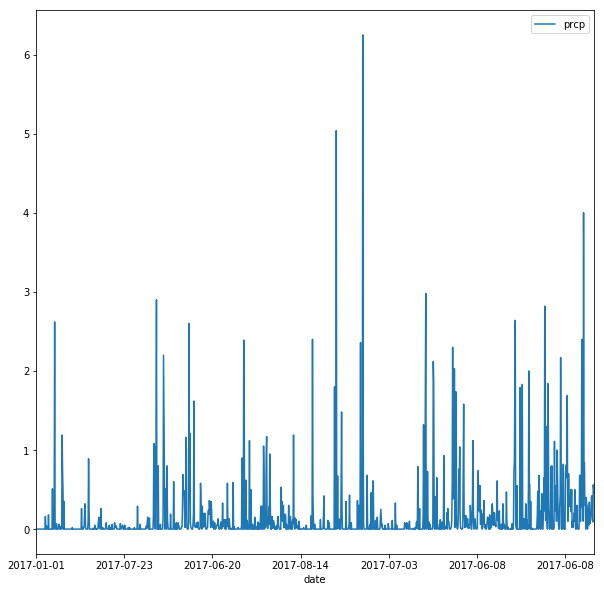

In [6]:
data.plot(figsize=(10,10))
# Give our graph axis labels
plt.xlabel("Date Range")
plt.ylabel("Precipitation")

# Set the Title for the graph
plt.title("Precipitation Totals")
plt.show()

In [7]:
data.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [8]:
data2 = pd.read_sql("SELECT station, SUM(tobs) as 'instances' FROM measurement GROUP BY station ORDER BY instances DESC;",conn)
data2

,station,instances
0,USC00519397,200205
1,USC00519281,198652
2,USC00513117,195940
3,USC00519523,191698
4,USC00516128,176029
5,USC00514830,144913
6,USC00511918,138191
7,USC00517948,50943
8,USC00518838,24855


In [9]:
#Get last 12 months of data
data3 = pd.read_sql("SELECT station, tobs FROM measurement WHERE date >= '2016-01-01' AND date <= '2016-12-31';",conn)
data3 = data3.groupby(["station"]).sum()
data3

,tobs
station,
USC00513117,26933
USC00514830,22153
USC00516128,22667
USC00517948,2990
USC00519281,26755
USC00519397,27111
USC00519523,24674


** Based on the above - we want to plot the 2016 observations from station USC00513117 **

In [10]:
data4 = pd.read_sql("SELECT date, prcp FROM measurement WHERE date >= '2016-01-01' AND date <= '2016-12-31' AND station = 'USC00513117';",conn)
data4['date'] = pd.to_datetime(data4['date'])
data4['month'] = data4['date'].dt.month
data4 = data4.groupby(["month"]).sum()
data4


,prcp
month,
1,1.25
2,1.86
3,5.68
4,2.43
5,5.22
6,5.19
7,10.75
8,8.88
9,3.76


In [11]:
data4.reset_index(inplace=True)
data4

,month,prcp
0,1,1.25
1,2,1.86
2,3,5.68
3,4,2.43
4,5,5.22
5,6,5.19
6,7,10.75
7,8,8.88
8,9,3.76
9,10,1.08


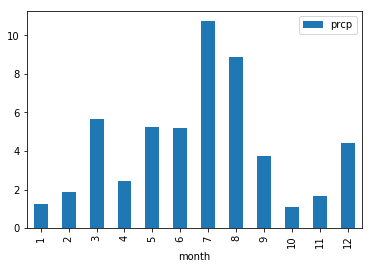

In [12]:
data4.plot.bar(x='month',y='prcp')
# Give our graph axis labels
plt.xlabel("Months")
plt.ylabel("Precipitation")

# Set the Title for the graph
plt.title("Precipitation Levels for 12 Months")

plt.show()

In [21]:
success = "no"

while success == "no":
    start_date = str(pd.to_datetime(input('Enter the departure date (mm-dd-yyyy)')))[0:10]

    end_date = str(pd.to_datetime(input('Enter the return date (mm-dd-yyyy)')))[0:10]

    if days_between(start_date,end_date) <= 15 and days_between(start_date,end_date) >=3:
        print("success")
        success = "yes"
    else:
        print("ERROR: Your vacation must be between 3 and 15 days. Please re-enter your departure and return dates")
        success = "no"

Enter the departure date (mm-dd-yyyy)01-01-2015
Enter the return date (mm-dd-yyyy)01-01-2015
ERROR: Your vacation must be between 3 and 15 days. Please re-enter your departure and return dates
Enter the departure date (mm-dd-yyyy)01-01-2015
Enter the return date (mm-dd-yyyy)01-05-2015
success


** NEED TO MAKE A FUNCTION TO GET THAT TO WORK - NEED TO SQL USING THE INPUT PARAMETERS. **

In [14]:
data = pd.read_sql("SELECT date, prcp FROM measurement WHERE (date) >= cast('"+str(start_date)+"' as varchar(8)) AND (date) <= cast('"+str(end_date)+"' as varchar(8));",conn)
data.head()

,date,prcp
0,2015-01-01,0.00
1,2015-01-02,0.04
2,2015-01-03,0.86
3,2015-01-01,0.01
4,2015-01-02,0.01


In [15]:
data = data.set_index('date')
data.head()

,prcp
date,
2015-01-01,0.00
2015-01-02,0.04
2015-01-03,0.86
2015-01-01,0.01
2015-01-02,0.01


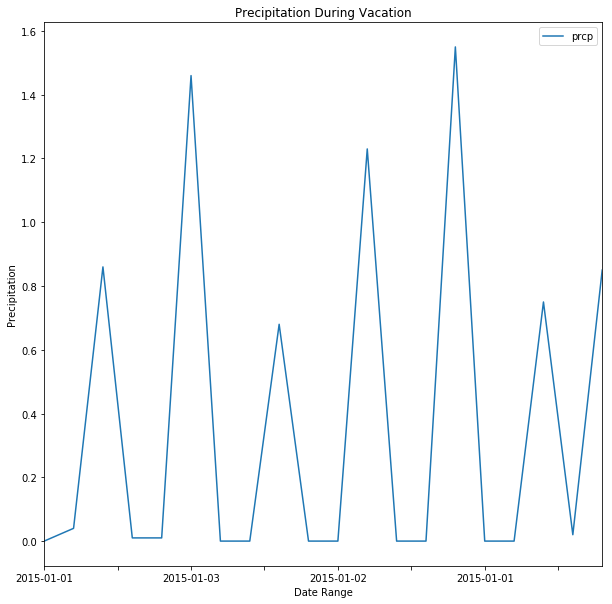

In [16]:
data.plot(figsize=(10,10))

# Give our graph axis labels
plt.xlabel("Date Range")
plt.ylabel("Precipitation")

# Set the Title for the graph
plt.title("Precipitation During Vacation")

# Display the graph
plt.show()

In [17]:
data.describe()

,prcp
count,20.000000
mean,0.373000
std,0.550293
min,0.000000
25%,0.000000
50%,0.010000
75%,0.775000
max,1.550000
